# About project 
#### Steps for this project:
1. Preprocessing: This includes steps such as imporing dataset, reshaping data, one hot encoding and visualizing so that data is in appropriate form
2. Iteration 1: In this I have made model like NN and knn and evaluated their performances on above data. 
3. Iteration 2: In this I further preprocessed data by cropping images from left and right not at the top and then made KNN and NN on this cropped images and then saw models performances
4. Data Augmentation: I have used data augmentation tech such as rotation and brightness level and made NN on these augmented data. Data augmenetation is real time 
5. Grid search: Here I have want to see various paramter and want to know which parameter is better. I used this to get a general idea about optimal hyperparameter. Then I made final model of NN based on these optimal parameter 
6. Conclusion: Here I concluded my observation and told which model is better and why is it so

In [1]:
#Importing Libs
import numpy as np
import pandas as pd
import h5py
import keras
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Dropout
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import model_selection
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten
%matplotlib inline

C:\Users\sarth\Anaconda3\envs\gputest\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


# Step 1: Data preprocessing
This includes
1. importing data from .h5 files
2. visualizing data
3. reshaping features
4. performing one hot encoding to labels 

#### Importing dataset 

In [2]:
#Importing .h5 file
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

In [3]:
#Seeing keys of h5 file
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [4]:
#Importing test data to a variable
first_X_test = h5f['X_test']

In [5]:
#Seeing shape of test data
first_X_test.shape

(18000, 32, 32)

In [6]:
#Importing train data to a variable
X_train = h5f['X_train'][:]


In [7]:
#Seeing shape of train data
X_train.shape

(42000, 32, 32)

In [8]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

In [9]:
# Close this file
h5f.close()

In [10]:
#Cross check step
#Seeing shape of train, test and validation set
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)


#### Displaying data 

In [11]:
#This is creating random numbers so that I can plot random plots for validation dataset. Down the line 
l=[]
from random import randint
for _ in range(10):
    value = randint(0, 60000)
    l.append(value)
print(l)

[48440, 14797, 21917, 1972, 43383, 35025, 55786, 53800, 51282, 37415]


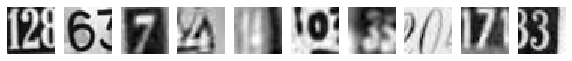

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [12]:
# visualizing the first 10 images in the dataset and their labels for training set
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

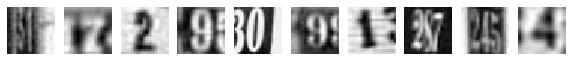

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [13]:
# visualizing the first 10 images in the dataset and their labels  for test set
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

label for each image


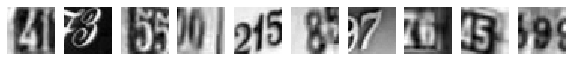

[4, 3, 5, 0, 1, 8, 7, 6, 5, 9]


In [14]:
# visualizing the random images in the dataset and their labels for validation set 
#Here I am seeing random figures
z=[]
plt.figure(figsize=(10, 1))
print("label for each image")
for i,j in enumerate(l):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_val[j].reshape(32, 32), cmap="gray")
    plt.axis('off')
    z.append(y_val[j])
plt.show()
print(z)

In [15]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train1 = X_train.reshape((X_train.shape[0], -1))
X_test1 = X_test.reshape((X_test.shape[0], -1))
X_val1 = X_val.reshape((X_val.shape[0], -1))

In [16]:
# converting y data into categorical (one-hot encoding)
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
y_val1 = to_categorical(y_val)

In [17]:
#printing shape of dataset
print(X_train1.shape, X_test1.shape, X_val1.shape, y_train1.shape, y_test1.shape, y_val1.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [18]:
#Seeing max values of features for all sets
print(X_train1.max())
print(X_test1.max())
print(X_val1.max())

254.9745
254.9745
254.9745


In [19]:
#Scaling data which is required for better performance of model
sc=StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)
X_val1 = sc.transform(X_val1)

In [20]:
#Seeing max values of features for all sets after scaling
#Cross check step
print(X_train1.max())
print(X_test1.max())
print(X_val1.max())

3.2250576
3.2250576
3.2250576


# Step 1: Iteration 1

In this I made 2 model based on above scaled datasets. I have made KNN and NN and then evaluated model performance by confusion matrix and classification report 

## KNN 
In this  I first made the model, then fitted to traing set and then evaluated

In [21]:
#KNN model buliding and fitting model to train data  with 5 neighbour 
knn=KNeighborsClassifier(n_neighbors = 3, metric='minkowski', p=2, n_jobs=-1) #this is for eucledian only not for minkowski
knn.fit(X_train1,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
#Getting predictions for test set
y_pred=knn.predict(X_test1)

In [23]:
#Printing confusion matrix 
confusion_matrix(y_test,y_pred)

array([[1242,   78,   55,   64,   64,   43,  101,   23,   68,   76],
       [ 130, 1335,   97,   75,   82,   30,   23,   35,   10,   11],
       [ 147,  276,  994,  108,   54,   34,   26,   89,   35,   40],
       [ 181,  297,  202,  669,   64,  129,   39,   31,   62,   45],
       [ 194,  308,   64,   79, 1033,   25,   44,   12,   32,   21],
       [ 237,  192,  121,  321,   73,  561,  103,   14,   87,   59],
       [ 430,  155,   74,  103,  131,  154,  586,    4,  173,   22],
       [ 156,  282,  164,   78,   31,   21,   21, 1014,   10,   31],
       [ 383,  165,   98,  209,   93,  139,  190,   10,  468,   57],
       [ 463,  163,  124,  133,   77,   81,   73,   37,   78,  575]],
      dtype=int64)

In [24]:
#Printing classification report that consists of recall, precison, f1 score, accuracy
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.35      0.68      0.46      1814
           1       0.41      0.73      0.53      1828
           2       0.50      0.55      0.52      1803
           3       0.36      0.39      0.38      1719
           4       0.61      0.57      0.59      1812
           5       0.46      0.32      0.38      1768
           6       0.49      0.32      0.39      1832
           7       0.80      0.56      0.66      1808
           8       0.46      0.26      0.33      1812
           9       0.61      0.32      0.42      1804

    accuracy                           0.47     18000
   macro avg       0.50      0.47      0.46     18000
weighted avg       0.51      0.47      0.47     18000



In [25]:
#Accuracy score
knn.score(X_test1, y_test)

0.47094444444444444

In [26]:
print("Here you can see knn performance is very low. This model is also very slow in testing period. Lets see the NN")

Here you can see knn performance is very low. This model is also very slow in testing period. Lets see the NN


##  NN

#### It contains 8 main steps
0. Observation step: In this I just made a model and saw how things are going on. This is just a observation model. As this step is just to observe ther given 0th name
1. Wts Init: In this I have init weight with different techniques such as he_normal, he_uniform and lecun_normal
2. Nonlinearity: Here I am changing activation function activation function to add non linearity so that performance increases
3. Batch Normalization
4. Droupout: I introduced dropout to give model accuracy boost and to regularize model
5. Putting everthing: Here based on what I observed in above steps I have integrated everthing to give sturcture to my final model 
6. Incresing layers and adding decay: Here I have incresed layers and saw the performance
7. Final model: In this model I have integrated everthing and to improve I have increased epochs and evaluated performance

***NOTE: I only have evaluated model at step 7 and for rest i just calculates accuracy score so that I could get idea about what to put***

#### 0. Observation step

In [21]:
#Init graph and defining layers
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
history = model.fit(X_train1, y_train1, batch_size = 32, epochs = 10, verbose = 1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 6s 141us/sample - loss: 2.3186 - accuracy: 0.1006
Epoch 2/10
42000/42000 [==============================] - 3s 73us/sample - loss: 2.3035 - accuracy: 0.1004
Epoch 3/10
42000/42000 [==============================] - 3s 74us/sample - loss: 2.3038 - accuracy: 0.0997
Epoch 4/10
42000/42000 [==============================] - 3s 74us/sample - loss: 2.3038 - accuracy: 0.0993
Epoch 5/10
42000/42000 [==============================] - 3s 74us/sample - loss: 2.3037 - accuracy: 0.0988
Epoch 6/10
42000/42000 [==============================] - 3s 77us/sample - loss: 2.3036 - accuracy: 0.1010
Epoch 7/10
42000/42000 [==============================] - 3s 76us/sample - loss: 2.3038 - accuracy: 0.1001
Epoch 8/10
42000/42000 [==============================] - 3s 78us/sample - loss: 2.3036 - accuracy: 0.1026
Epoch 9/10
42000/42000 [==============================] - 3s 77us/sample - loss: 2.3034 - accuracy: 0.1033
Epoch 10/10
4

In [23]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy:  0.100666665


In [25]:
#Accuracy seems less but it gave me a generalidea about the starting. Now lets tune hyperparmeter

### 1. Weight Initialization

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem 
up to some degree

***he_normal, he_uniform and lecun_normal are used in this steps***


#### he_normal 

In [26]:
# from now on, create a function to generate (return) models
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size=32, epochs = 10, verbose = 1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 84us/sample - loss: 2.3348 - accuracy: 0.1014
Epoch 2/10
42000/42000 [==============================] - 3s 77us/sample - loss: 2.3035 - accuracy: 0.1005
Epoch 3/10
42000/42000 [==============================] - 3s 77us/sample - loss: 2.3029 - accuracy: 0.0999
Epoch 4/10
42000/42000 [==============================] - 3s 76us/sample - loss: 2.3028 - accuracy: 0.1011
Epoch 5/10
42000/42000 [==============================] - 3s 79us/sample - loss: 2.3028 - accuracy: 0.0998
Epoch 6/10
42000/42000 [==============================] - 3s 78us/sample - loss: 2.3028 - accuracy: 0.1014
Epoch 7/10
42000/42000 [==============================] - 3s 77us/sample - loss: 2.3028 - accuracy: 0.1000
Epoch 8/10
42000/42000 [==============================] - 3s 76us/sample - loss: 2.3028 - accuracy: 0.1022
Epoch 9/10
42000/42000 [==============================] - 3s 76us/sample - loss: 2.3028 - accuracy: 0.1030
Epoch 10/10
42

In [40]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 80us/sample - loss: 2.3028 - acc: 0.1006
Test accuracy:  0.10061111


In [41]:
#Accuracy increased lets see other two

#### he_uniform

In [42]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_uniform'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_uniform'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_uniform'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_uniform'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_uniform'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [43]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size=32, epochs = 10, verbose = 1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 110us/sample - loss: 2.3633 - acc: 0.1020
Epoch 2/10
42000/42000 [==============================] - 5s 117us/sample - loss: 2.3038 - acc: 0.1024
Epoch 3/10
42000/42000 [==============================] - 5s 126us/sample - loss: 2.3027 - acc: 0.1037
Epoch 4/10
42000/42000 [==============================] - 5s 125us/sample - loss: 2.3027 - acc: 0.1029
Epoch 5/10
42000/42000 [==============================] - 5s 120us/sample - loss: 2.3027 - acc: 0.1058
Epoch 6/10
42000/42000 [==============================] - 5s 111us/sample - loss: 2.3026 - acc: 0.1056
Epoch 7/10
42000/42000 [==============================] - 5s 123us/sample - loss: 2.3027 - acc: 0.1047
Epoch 8/10
42000/42000 [==============================] - 5s 124us/sample - loss: 2.3027 - acc: 0.1049
Epoch 9/10
42000/42000 [==============================] - 5s 120us/sample - loss: 2.3027 - acc: 0.1023
Epoch 10/10
42000/42000 [=========================

In [44]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 77us/sample - loss: 2.3027 - acc: 0.1043
Test accuracy:  0.104277775


In [45]:
#Accuracy is less than le_normal

#### lecun_normal

In [46]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='lecun_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='lecun_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='lecun_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='lecun_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='lecun_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [47]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
model = mlp_model()
history = model.fit(X_train1, y_train1, batch_size=32, epochs = 10, verbose = 1)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 119us/sample - loss: 2.3264 - acc: 0.0999
Epoch 2/10
42000/42000 [==============================] - 5s 130us/sample - loss: 2.3031 - acc: 0.1004
Epoch 3/10
42000/42000 [==============================] - 5s 108us/sample - loss: 2.3027 - acc: 0.1012
Epoch 4/10
42000/42000 [==============================] - 5s 120us/sample - loss: 2.3027 - acc: 0.1007
Epoch 5/10
42000/42000 [==============================] - 5s 128us/sample - loss: 2.3027 - acc: 0.1006
Epoch 6/10
42000/42000 [==============================] - 5s 131us/sample - loss: 2.3027 - acc: 0.1025
Epoch 7/10
42000/42000 [==============================] - 5s 117us/sample - loss: 2.3027 - acc: 0.1011
Epoch 8/10
42000/42000 [==============================] - 5s 124us/sample - loss: 2.3027 - acc: 0.0993
Epoch 9/10
42000/42000 [==============================] - 5s 116us/sample - loss: 2.3027 - acc: 0.1004
Epoch 10/10
42000/42000 [=========================

In [48]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 72us/sample - loss: 2.3028 - acc: 0.0951
Test accuracy:  0.09511111


In [49]:
#Accuracy is less than le_normal

In [50]:
print("It seems weight init is helping eventhough it only very little but still its helping. Here we can see he_normal is giving highest accuracy so we will use it ")

It seems weight init is helping eventhough it only very little but still its helping. Here we can see he_normal is giving highest accuracy so we will use it 


### 2. Nonlinearity (Activation function)

Sigmoid functions suffer from gradient vanishing problem, making training slower
***'relu' (rectified linear unit) is one we will use as it introduces non linearity to our model***

In [28]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [29]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
model = mlp_model()
history = model.fit(X_train1, y_train1, epochs = 10, verbose = 1, batch_size=32)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 13s 316us/sample - loss: 2.3143 - accuracy: 0.1139
Epoch 2/10
42000/42000 [==============================] - 13s 307us/sample - loss: 2.2781 - accuracy: 0.1510
Epoch 3/10
42000/42000 [==============================] - 12s 297us/sample - loss: 2.2469 - accuracy: 0.1832
Epoch 4/10
42000/42000 [==============================] - 11s 269us/sample - loss: 2.1973 - accuracy: 0.2193
Epoch 5/10
42000/42000 [==============================] - 11s 271us/sample - loss: 2.1161 - accuracy: 0.2671
Epoch 6/10
42000/42000 [==============================] - 12s 288us/sample - loss: 1.9887 - accuracy: 0.3298
Epoch 7/10
42000/42000 [==============================] - 12s 290us/sample - loss: 1.8255 - accuracy: 0.3963
Epoch 8/10
42000/42000 [==============================] - 12s 276us/sample - loss: 1.6706 - accuracy: 0.4590
Epoch 9/10
42000/42000 [==============================] - 12s 276us/sample - loss: 1.5508 - accuracy: 0.5

In [53]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 80us/sample - loss: 1.3157 - acc: 0.5843
Test accuracy:  0.58433336


In [54]:
# This relu is increasing accuracy of model therefore we will be using it. Lets further see other parameter

### 3. Batch Normalization

Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective

In [23]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, )))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
model = mlp_model()
history = model.fit(X_train1, y_train1, epochs = 10, verbose = 1, batch_size=32)

In [ ]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

In [61]:
# This batchnorm is increasing accuracy of model therefore we will be using it. Lets further see other parameter

### 4. Dropout

In [62]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    model.add(Dense(50, input_shape = (1024, )))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [63]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
model = mlp_model()
history = model.fit(X_train1, y_train1, epochs = 10, verbose = 1, batch_size=32)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 182us/sample - loss: 2.0290 - acc: 0.2481
Epoch 2/10
42000/42000 [==============================] - 8s 197us/sample - loss: 1.5624 - acc: 0.4635
Epoch 3/10
42000/42000 [==============================] - 8s 196us/sample - loss: 1.4143 - acc: 0.5339
Epoch 4/10
42000/42000 [==============================] - 8s 196us/sample - loss: 1.3254 - acc: 0.5667
Epoch 5/10
42000/42000 [==============================] - 8s 197us/sample - loss: 1.2720 - acc: 0.5900
Epoch 6/10
42000/42000 [==============================] - 8s 196us/sample - loss: 1.2274 - acc: 0.6120
Epoch 7/10
42000/42000 [==============================] - 8s 189us/sample - loss: 1.1957 - acc: 0.6257
Epoch 8/10
42000/42000 [==============================] - 8s 190us/sample - loss: 1.1657 - acc: 0.6349
Epoch 9/10
42000/42000 [==============================] - 9s 203us/sample - loss: 1.1413 - acc: 0.6446
Epoch 10/10
42000/42000 [=========================

In [65]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 2s 102us/sample - loss: 0.8758 - acc: 0.7289
Test accuracy:  0.7289444


In [66]:
# This dropout is increasing accuracy of model therefore we will be using it. Lets further see other parameter

### 5.  Putting all together

In [67]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [68]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
model = mlp_model()
history = model.fit(X_train1, y_train1, epochs = 10, verbose = 1, batch_size=32)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 14s 333us/sample - loss: 2.2371 - acc: 0.1754
Epoch 2/10
42000/42000 [==============================] - 13s 305us/sample - loss: 1.8142 - acc: 0.3508
Epoch 3/10
42000/42000 [==============================] - 12s 293us/sample - loss: 1.6196 - acc: 0.4413
Epoch 4/10
42000/42000 [==============================] - 13s 307us/sample - loss: 1.5315 - acc: 0.4809
Epoch 5/10
42000/42000 [==============================] - 13s 306us/sample - loss: 1.4581 - acc: 0.5144
Epoch 6/10
42000/42000 [==============================] - 13s 307us/sample - loss: 1.4141 - acc: 0.5333
Epoch 7/10
42000/42000 [==============================] - 13s 307us/sample - loss: 1.3712 - acc: 0.5538
Epoch 8/10
42000/42000 [==============================] - 13s 308us/sample - loss: 1.3423 - acc: 0.5642
Epoch 9/10
42000/42000 [==============================] - 13s 310us/sample - loss: 1.3013 - acc: 0.5825
Epoch 10/10
42000/42000 [================

In [69]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 2s 111us/sample - loss: 0.8956 - acc: 0.7339
Test accuracy:  0.73388886


In [70]:
# When we put everthiing together it is giving high accuracy that means we are right on track. Lets see what happens when we increase layer.

### 6. Incresing number of layers and adding decay

In [71]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001, decay=0.00001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [72]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 10 
model = mlp_model()
history = model.fit(X_train1, y_train1, epochs = 10, verbose = 1, batch_size=32)

Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 17s 400us/sample - loss: 2.3036 - acc: 0.1528
Epoch 2/10
42000/42000 [==============================] - 16s 389us/sample - loss: 1.9421 - acc: 0.2839
Epoch 3/10
42000/42000 [==============================] - 16s 385us/sample - loss: 1.7566 - acc: 0.3728
Epoch 4/10
42000/42000 [==============================] - 16s 387us/sample - loss: 1.6445 - acc: 0.4203
Epoch 5/10
42000/42000 [==============================] - 16s 387us/sample - loss: 1.5649 - acc: 0.4634
Epoch 6/10
42000/42000 [==============================] - 16s 387us/sample - loss: 1.5022 - acc: 0.4908
Epoch 7/10
42000/42000 [==============================] - 16s 390us/sample - loss: 1.4615 - acc: 0.5140
Epoch 8/10
42000/42000 [==============================] - 17s 398us/sample - loss: 1.4179 - acc: 0.5325
Epoch 9/10
42000/42000 [==============================] - 16s 373us/sample - loss: 1.3861 - acc: 0.5432
Epoch 10/10
42000/42000 [================

In [73]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 3s 145us/sample - loss: 0.9687 - acc: 0.6979
Test accuracy:  0.69794446


In [74]:
#By increasing layers we are getting less right prediction thus accuracy decrease can be seen. Thus we wont add one extra layer. Now lets do final tuing of increasing epochs

### 7. Final model( Increased number of epochs)

In [22]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (1024, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001, decay=0.00001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 100 
#Here side by side I am printing tes accuracy as well using 'validation_data' argument
model = mlp_model()
history = model.fit(X_train1, y_train1, epochs = 100, verbose = 1, validation_data=(X_test1, y_test1), batch_size=32)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
17184/42000 [===========>..................] - ETA: 24s - loss: 2.3906 - accuracy: 0.1322

In [77]:
#predicting test data and then printing prediction
results = model.evaluate(X_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 30us/sample - loss: 0.6459 - acc: 0.8102
Test accuracy:  0.81016666


In [78]:
#Model summary about number of parameters and all
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 50)                51250     
_________________________________________________________________
batch_normalization_13 (Batc (None, 50)                200       
_________________________________________________________________
activation_46 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_14 (Batc (None, 50)                200       
_________________________________________________________________
activation_47 (Activation)   (None, 50)              

In [79]:
#Getting prediction of test set
prediction = model.predict([X_test1])

In [80]:
#Seeing the prob of label  
print(prediction)

[[3.0588958e-01 2.7195933e-01 2.5038632e-02 ... 3.7699446e-02
  7.9770744e-02 7.0703983e-02]
 [3.8580659e-03 2.5565103e-02 2.7455729e-01 ... 6.6780013e-01
  4.6710325e-03 3.8843574e-03]
 [3.5916749e-04 4.5070326e-04 9.8522526e-01 ... 4.3533091e-03
  2.2362832e-03 1.2975964e-03]
 ...
 [8.2213321e-04 1.3892373e-02 4.3612937e-03 ... 9.7782350e-01
  8.9613124e-05 4.5512230e-04]
 [1.1082791e-02 9.3198020e-04 7.8260461e-03 ... 1.5906015e-03
  4.7400158e-02 8.8080859e-01]
 [1.9414341e-03 3.0511196e-03 9.2352688e-01 ... 1.7000617e-02
  1.3914026e-02 1.0752921e-02]]


In [81]:
#Creating empty list then appending it with index value which recieved max score
#Argmax will return a index value, that index value will be the label
q=[]
for i in prediction:
    q.append(np.argmax(i))
print(q) #Seeing the predictions

[0, 7, 2, 9, 0, 9, 1, 5, 1, 4, 8, 2, 1, 4, 5, 5, 8, 6, 5, 5, 0, 6, 5, 8, 3, 2, 0, 2, 9, 5, 2, 8, 9, 1, 0, 9, 5, 1, 3, 7, 0, 4, 2, 4, 9, 5, 2, 8, 8, 3, 5, 3, 7, 1, 4, 8, 4, 4, 0, 9, 0, 1, 5, 9, 5, 2, 2, 7, 8, 8, 9, 8, 3, 8, 4, 5, 2, 8, 6, 4, 5, 4, 2, 8, 2, 4, 0, 9, 9, 5, 5, 2, 8, 5, 0, 7, 6, 0, 8, 7, 7, 7, 1, 2, 1, 4, 9, 6, 1, 4, 1, 0, 9, 0, 8, 4, 4, 1, 0, 9, 0, 3, 9, 0, 5, 0, 3, 9, 4, 1, 6, 6, 0, 9, 4, 9, 8, 9, 5, 4, 9, 2, 4, 5, 5, 0, 0, 0, 9, 8, 5, 0, 8, 9, 4, 6, 8, 4, 3, 7, 8, 0, 1, 5, 9, 2, 7, 6, 7, 1, 5, 2, 9, 0, 4, 5, 0, 5, 5, 5, 7, 2, 9, 6, 4, 5, 1, 3, 8, 9, 6, 8, 4, 9, 5, 2, 7, 8, 6, 5, 3, 5, 2, 9, 0, 2, 1, 8, 2, 8, 5, 5, 2, 0, 2, 9, 0, 2, 0, 9, 5, 1, 7, 4, 8, 9, 6, 0, 1, 3, 1, 8, 8, 3, 0, 3, 4, 7, 7, 4, 8, 7, 2, 3, 9, 0, 8, 4, 1, 3, 3, 3, 0, 1, 5, 7, 0, 0, 8, 2, 4, 6, 4, 9, 7, 7, 9, 8, 4, 2, 9, 4, 5, 0, 1, 7, 7, 0, 8, 9, 6, 3, 7, 7, 0, 6, 3, 2, 5, 2, 5, 4, 3, 0, 9, 1, 4, 5, 5, 5, 0, 3, 7, 3, 5, 1, 8, 4, 1, 4, 8, 6, 0, 3, 3, 2, 6, 1, 0, 1, 0, 6, 5, 9, 2, 1, 0, 7, 7, 0, 6, 3, 8, 

In [82]:
#Printing confusion matrix 
confusion_matrix(y_test,q)

#confusion matrix shows it is predicting better than knn

array([[1562,   48,   24,   13,   36,    2,   20,   28,   29,   52],
       [  55, 1568,   16,   25,   75,    9,    8,   50,   17,    5],
       [  25,   45, 1464,   51,   36,   10,    5,   86,   29,   52],
       [  16,   75,   38, 1299,   41,  135,   11,   36,   45,   23],
       [  27,   81,   27,   15, 1545,   25,   18,   17,   15,   42],
       [  10,   37,   14,   88,   25, 1433,   71,   15,   37,   38],
       [  42,   39,   13,   24,   71,   86, 1422,   15,   97,   23],
       [  29,   94,   52,   28,   23,    2,    7, 1538,   19,   16],
       [  43,   60,   26,   56,   39,   54,   89,   15, 1354,   76],
       [  90,   56,   28,   50,   42,   37,    9,   29,   65, 1398]],
      dtype=int64)

In [83]:
#Printing classification report that consists of recall, precison, f1 score, accuracy
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.35      0.68      0.46      1814
           1       0.41      0.73      0.53      1828
           2       0.50      0.55      0.52      1803
           3       0.36      0.39      0.38      1719
           4       0.61      0.57      0.59      1812
           5       0.46      0.32      0.38      1768
           6       0.49      0.32      0.39      1832
           7       0.80      0.56      0.66      1808
           8       0.46      0.26      0.33      1812
           9       0.61      0.32      0.42      1804

    accuracy                           0.47     18000
   macro avg       0.50      0.47      0.46     18000
weighted avg       0.51      0.47      0.47     18000



In [84]:
print("This model is giving us a good score but can we increase the accuracy. Lets further preprocess data")

This model is giving us a good score but can we increase the accuracy. Lets further preprocess data


# Step 3 : Iteration 2

In this I did following
1. I first cropped the images from left and right using a function 'crop_center'. To this function i iterated each data one by one using for loop then I visualized data for all sets then rescaled the data
2. Then made knn model on this cropped data and evaluated the model
3. Finally made the NN and evaluated the performance

In [85]:
#This is crop function
def crop_center(img):
    return img[0:32,5:27]

# what concept I used is:
#32-22=10
#10/2=5
#Thus cropping each images from both side by 5 pixel therefore 5,27

In [86]:
#Creating empty list first and using for loop each images are passed to to crop function for train set
l=[]
for img in X_train:
    img1=crop_center(img)
    l.append(img1)

In [87]:
#Creating array of list
img_train=np.array(l)

In [88]:
#Creating empty list first and using for loop each images are passed to to crop function for test set
l=[]
for img in X_test:
    img1=crop_center(img)
    l.append(img1)

In [89]:
#Creating array of list
img_test=np.array(l)

In [90]:
#Creating empty list first and using for loop each images are passed to to crop function for validation set
l=[]
for img in X_val:
    img1=crop_center(img)
    l.append(img1)

In [91]:
#Creating array of list
img_val=np.array(l)

In [92]:
#Printing shape to cross check if it implemented properly 
print(img_train.shape)
print(img_test.shape)
print(img_val.shape)

#yes it did

(42000, 32, 22)
(18000, 32, 22)
(60000, 32, 22)


#### Visualizing Train set

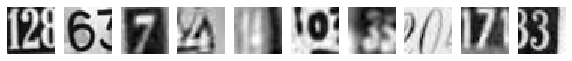

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [93]:
# visualizing the first 10 images in the dataset and their labels for training set
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

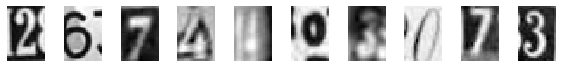

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [94]:
# visualizing the first 10 images in the dataset and their labels for training set for new cropped data
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(img_train[i].reshape(32, 22), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

#### Visualizing Test set

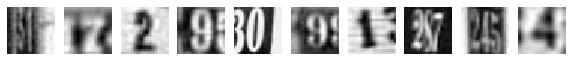

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [95]:
# visualizing the first 10 images in the dataset and their labels for new cropped train set data
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

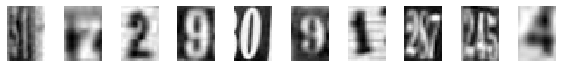

label for each of the above image: [1 7 2 9 0 9 1 8 4 4]


In [96]:
# visualizing the first 10 images in the dataset and their labels for new cropped test set data
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(img_test[i].reshape(32, 22), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_test[0:10]))

In [97]:
#Rescaling data and scling data steps

In [98]:
#Seeing shape of new data
print(img_train.shape, img_test.shape, img_val.shape)

(42000, 32, 22) (18000, 32, 22) (60000, 32, 22)


In [99]:
# reshaping X data: (n, 32, 22) => (n, 704)
img_train1 = img_train.reshape((X_train.shape[0], -1))
img_test1 = img_test.reshape((X_test.shape[0], -1))
img_val1 = img_val.reshape((X_val.shape[0], -1))

In [100]:
#Seeing shape of new data after reshaping
print(img_train1.shape, img_test1.shape, img_val1.shape, y_train1.shape, y_test1.shape, y_val1.shape)

(42000, 704) (18000, 704) (60000, 704) (42000, 10) (18000, 10) (60000, 10)


In [101]:
#Printing max value of new data
print(img_train1.max())
print(img_test1.max())
print(img_val1.max())

254.9745
254.9745
254.9745


In [102]:
#Scaling new copped data
sc=StandardScaler()
img_train1 = sc.fit_transform(img_train1)
img_test1 = sc.transform(img_test1)
img_val1 = sc.transform(img_val1)

In [103]:
#Printing max value of new data after scaling
print(img_train1.max())
print(img_test1.max())
print(img_val1.max())

3.2250576
3.2250576
3.2250576


## Model building 

Here 2 models are made on cropped data
1. KNN: model is made on cropped data and performance is evaluated sing confusion matrix and clsiification report
2. NN: The NN is tested on new cropped data. Here NN is same that I finalize above in iteration 1. Performance is also evaluated using confusion matrix and classification report also I have printed model summary

## KNN 

In [104]:
#KNN model buliding and fitting model to train data  with 5 neighbour 
knn=KNeighborsClassifier(n_neighbors = 3, metric='minkowski', p=2, n_jobs=-1) #this is for eucledian only not for minkowski
knn.fit(img_train1,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [105]:
#Getting predictions for test set
y_pred=knn.predict(img_test1)


In [106]:
#Confusion matrix printing
confusion_matrix(y_test,y_pred)

array([[1435,   63,   37,   47,   31,   35,   63,   12,   35,   56],
       [ 125, 1462,   54,   55,   49,   13,   17,   30,   13,   10],
       [ 112,  204, 1181,   73,   38,   25,   14,   92,   27,   37],
       [ 142,  275,  112,  924,   41,  109,   19,   30,   34,   33],
       [ 120,  249,   29,   33, 1297,   20,   23,   11,   16,   14],
       [ 174,  176,   74,  236,   47,  867,   81,   16,   59,   38],
       [ 371,  109,   38,   70,   85,   94,  894,   12,  140,   19],
       [ 105,  246,  104,   59,   31,   16,   15, 1205,   10,   17],
       [ 316,  148,   65,  117,   53,  124,  165,   13,  753,   58],
       [ 333,  140,   90,   91,   52,   75,   49,   36,   59,  879]],
      dtype=int64)

In [107]:
#Printing classification report that consists of recall, precison, f1 score, accuracy
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.79      0.57      1814
           1       0.48      0.80      0.60      1828
           2       0.66      0.66      0.66      1803
           3       0.54      0.54      0.54      1719
           4       0.75      0.72      0.73      1812
           5       0.63      0.49      0.55      1768
           6       0.67      0.49      0.56      1832
           7       0.83      0.67      0.74      1808
           8       0.66      0.42      0.51      1812
           9       0.76      0.49      0.59      1804

    accuracy                           0.61     18000
   macro avg       0.64      0.60      0.61     18000
weighted avg       0.64      0.61      0.61     18000



In [108]:
#Accuracy score
knn.score(img_test1, y_test)

0.6053888888888889

In [109]:
#Here the accuracy increased but still it is very less as compared to NN

## NN
Model building then fitting model to train set and finally evaluating the performance of the model

***NOTE: I have used the same model as was in iteration 1 step 7

In [110]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (704, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001, decay=0.00001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [111]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 100 
#Here side by side I am printing tes accuracy as well using 'validation_data' argument
model = mlp_model()
history = model.fit(img_train1, y_train1, epochs = 100, verbose = 1, validation_data=(img_test1, y_test1))

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 105us/sample - loss: 2.1484 - acc: 0.2212 - val_loss: 1.5473 - val_acc: 0.5111
Epoch 2/100
42000/42000 [==============================] - 4s 93us/sample - loss: 1.7085 - acc: 0.4039 - val_loss: 1.2270 - val_acc: 0.6161
Epoch 3/100
42000/42000 [==============================] - 4s 91us/sample - loss: 1.5391 - acc: 0.4778 - val_loss: 1.0871 - val_acc: 0.6747
Epoch 4/100
42000/42000 [==============================] - 4s 91us/sample - loss: 1.4488 - acc: 0.5188 - val_loss: 1.0220 - val_acc: 0.6901
Epoch 5/100
42000/42000 [==============================] - 4s 90us/sample - loss: 1.3802 - acc: 0.5501 - val_loss: 0.9570 - val_acc: 0.7191
Epoch 6/100
42000/42000 [==============================] - 4s 93us/sample - loss: 1.3346 - acc: 0.5706 - val_loss: 0.8991 - val_acc: 0.7365
Epoch 7/100
42000/42000 [==============================] - 4s 90us/sample - loss: 1.2907 - acc: 0.5886 - val_

Epoch 59/100
42000/42000 [==============================] - 4s 90us/sample - loss: 1.0255 - acc: 0.6807 - val_loss: 0.6419 - val_acc: 0.8109
Epoch 60/100
42000/42000 [==============================] - 4s 94us/sample - loss: 1.0368 - acc: 0.6762 - val_loss: 0.6481 - val_acc: 0.8073
Epoch 61/100
42000/42000 [==============================] - 4s 96us/sample - loss: 1.0338 - acc: 0.6779 - val_loss: 0.6501 - val_acc: 0.8102
Epoch 62/100
42000/42000 [==============================] - 4s 92us/sample - loss: 1.0312 - acc: 0.6790 - val_loss: 0.6411 - val_acc: 0.8121
Epoch 63/100
42000/42000 [==============================] - 4s 92us/sample - loss: 1.0249 - acc: 0.6814 - val_loss: 0.6446 - val_acc: 0.8151
Epoch 64/100
42000/42000 [==============================] - 4s 93us/sample - loss: 1.0179 - acc: 0.6852 - val_loss: 0.6399 - val_acc: 0.8128
Epoch 65/100
42000/42000 [==============================] - 4s 91us/sample - loss: 1.0135 - acc: 0.6829 - val_loss: 0.6393 - val_acc: 0.8119
Epoch 66/100


In [112]:
#predicting test data and then printing prediction
results = model.evaluate(img_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 34us/sample - loss: 0.6201 - acc: 0.8169
Test accuracy:  0.81688887


In [113]:
#Model summary about number of parameters and all
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 50)                35250     
_________________________________________________________________
batch_normalization_17 (Batc (None, 50)                200       
_________________________________________________________________
activation_51 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_18 (Batc (None, 50)                200       
_________________________________________________________________
activation_52 (Activation)   (None, 50)              

In [114]:
#Getting prediction of test set
prediction = model.predict([img_test1])

In [115]:
#Seeing the prob of label  
print(prediction)

[[2.4495819e-01 1.5221727e-01 6.5031826e-02 ... 7.0980199e-02
  8.8288382e-02 7.9183072e-02]
 [3.0702550e-03 7.2072395e-03 1.5941669e-01 ... 8.0476910e-01
  4.5656646e-03 2.6036436e-03]
 [2.1430473e-03 9.1786316e-04 9.6685219e-01 ... 9.5459428e-03
  3.7164688e-03 4.7954395e-03]
 ...
 [2.4828690e-03 1.6304832e-02 1.7167540e-02 ... 9.5103294e-01
  1.4146173e-03 2.6277145e-03]
 [1.0720428e-02 2.1963338e-03 8.4294965e-03 ... 1.8552940e-03
  1.2266383e-01 7.3493826e-01]
 [4.2722123e-03 1.4188016e-02 7.9589194e-01 ... 1.2819034e-01
  6.4433441e-03 8.3548678e-03]]


In [116]:
#Creating empty list then appending it with index value which recieved max score
#Argmax will return a index value, that index value will be the label
q=[]
for i in prediction:
    q.append(np.argmax(i))
print(q) #Seeing the predictions

[0, 7, 2, 9, 0, 9, 1, 6, 1, 4, 8, 2, 1, 4, 3, 5, 8, 6, 3, 5, 0, 6, 5, 8, 3, 2, 0, 0, 9, 5, 2, 8, 9, 1, 0, 9, 5, 4, 3, 7, 0, 4, 2, 4, 9, 5, 0, 8, 8, 3, 5, 3, 7, 1, 4, 8, 1, 1, 0, 9, 0, 1, 5, 9, 5, 2, 2, 7, 0, 8, 9, 8, 3, 8, 4, 5, 2, 8, 6, 4, 5, 4, 2, 8, 2, 4, 0, 9, 8, 5, 6, 2, 7, 5, 0, 7, 6, 4, 8, 7, 7, 7, 5, 2, 1, 4, 9, 6, 1, 4, 1, 0, 9, 0, 8, 4, 4, 1, 0, 9, 0, 3, 9, 0, 5, 0, 3, 9, 6, 1, 6, 6, 0, 9, 4, 9, 6, 9, 5, 4, 0, 2, 4, 5, 5, 0, 0, 0, 9, 8, 5, 0, 8, 9, 4, 6, 8, 4, 0, 7, 0, 0, 1, 5, 9, 2, 7, 6, 7, 1, 5, 2, 9, 0, 4, 5, 4, 5, 5, 5, 7, 2, 9, 6, 1, 5, 1, 3, 8, 9, 6, 8, 4, 9, 5, 2, 7, 8, 6, 5, 5, 5, 2, 3, 0, 2, 1, 8, 2, 8, 5, 5, 2, 0, 2, 9, 0, 2, 0, 9, 5, 1, 7, 1, 8, 9, 6, 0, 1, 3, 1, 8, 8, 3, 0, 3, 4, 7, 7, 3, 8, 7, 7, 3, 9, 0, 1, 4, 1, 3, 3, 1, 0, 1, 5, 7, 0, 0, 8, 2, 4, 6, 4, 9, 7, 7, 8, 3, 8, 2, 9, 4, 5, 0, 0, 7, 7, 0, 8, 9, 6, 3, 7, 7, 8, 6, 3, 2, 5, 2, 5, 4, 3, 0, 9, 1, 4, 5, 5, 5, 9, 7, 7, 3, 5, 1, 8, 4, 1, 4, 8, 6, 0, 3, 3, 2, 6, 1, 0, 1, 0, 6, 5, 9, 2, 1, 0, 7, 7, 0, 6, 3, 8, 

In [117]:
#Printing confusion matrix 
confusion_matrix(y_test,q)

array([[1599,   36,   17,   17,   33,    4,   17,   31,   26,   34],
       [  59, 1574,    8,   31,   63,    8,    7,   46,   18,   14],
       [  26,   41, 1438,   33,   38,   17,    5,  109,   24,   72],
       [  20,   64,   32, 1310,   31,  135,   13,   34,   52,   28],
       [  30,   75,   21,   10, 1574,   19,   13,   14,   14,   42],
       [  19,   31,    9,   90,   27, 1432,   78,   10,   35,   37],
       [  51,   37,    9,   17,   69,  107, 1430,    9,   87,   16],
       [  33,   90,   39,   23,   16,   14,    2, 1561,   12,   18],
       [  38,   55,   19,   68,   39,   50,   89,   11, 1369,   74],
       [  89,   50,   26,   48,   35,   55,   11,   30,   43, 1417]],
      dtype=int64)

In [118]:
#Printing classification report that consists of recall, precison, f1 score, accuracy
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.79      0.57      1814
           1       0.48      0.80      0.60      1828
           2       0.66      0.66      0.66      1803
           3       0.54      0.54      0.54      1719
           4       0.75      0.72      0.73      1812
           5       0.63      0.49      0.55      1768
           6       0.67      0.49      0.56      1832
           7       0.83      0.67      0.74      1808
           8       0.66      0.42      0.51      1812
           9       0.76      0.49      0.59      1804

    accuracy                           0.61     18000
   macro avg       0.64      0.60      0.61     18000
weighted avg       0.64      0.61      0.61     18000



In [119]:
#Here you can see our NN performance has increase a little bit but still our model is better than previous models
#Also Knn is underperforming and is taking lot of time in test phase which is very crutial in real life therfore we will tune NN from now on

# Step 4: Data augmentation 

Here I have augmented data by adding rotation utp 30 degrees and also I have used brightness level
Also this augmentation is in real time. Also dataset is previous cropped dataset

In [120]:
#Changing shape of data as it is required in data augmentration 
#here I have added 1 new shape which is number of channel channel 
img_train2 = img_train.reshape(img_train.shape[0], 32, 22, 1)
img_test2 = img_test.reshape(img_test.shape[0], 32, 22, 1)
img_val2 = img_val.reshape(img_val.shape[0], 32, 22, 1)

In [121]:
#As you can see the shape of all dataset it has one added shape 
print(img_train2.shape, img_test2.shape, img_val2.shape)

(42000, 32, 22, 1) (18000, 32, 22, 1) (60000, 32, 22, 1)


In [122]:
#Creating object of ImageDataGenerator which has max 30degrees of rotation and brightness range from 0.5 to 1.2
datagen = ImageDataGenerator(rotation_range=30,brightness_range=[0.5,1.2])

In [123]:
#Fitting training data to ImageDataGenerator object
datagen.fit(img_train2)

## NN
Here I using augmented data and evaluating model performace

In [130]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 22, 1, )))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001, decay=0.00001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [131]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 100 
#Here side by side I am printing tes accuracy as well using 'validation_data' argument
model = mlp_model()
history=model.fit_generator(datagen.flow(img_train2, y_train1, batch_size=32),verbose = 1, epochs=100)

Epoch 1/100
1313/1313 [==============================] - 14s 11ms/step - loss: 2.2614 - acc: 0.1727
Epoch 2/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.9394 - acc: 0.3029
Epoch 3/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.8023 - acc: 0.3727
Epoch 4/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.7283 - acc: 0.4031
Epoch 5/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.6758 - acc: 0.4268
Epoch 6/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.6490 - acc: 0.4410
Epoch 7/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.6172 - acc: 0.4547
Epoch 8/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.5821 - acc: 0.4685
Epoch 9/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.5560 - acc: 0.4785
Epoch 10/100
1313/1313 [==============================] - 13s 10ms/step - loss: 1.5346 - acc: 0.4858

In [132]:
#predicting test data and then printing prediction
results = model.evaluate(img_test2, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 49us/sample - loss: 0.8600 - acc: 0.7554
Test accuracy:  0.75544447


In [133]:
#Model summary about number of parameters and all
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 704)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 50)                35250     
_________________________________________________________________
batch_normalization_21 (Batc (None, 50)                200       
_________________________________________________________________
activation_56 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 50)                2550      
_________________________________________________________________
batch_normalization_22 (Batc (None, 50)              

In [134]:
#Getting prediction of test set
prediction = model.predict([img_test2])

In [135]:
#Seeing the prob of label  
print(prediction)

[[0.35406327 0.10304538 0.11353692 ... 0.05109481 0.08332448 0.07765635]
 [0.0144258  0.05012029 0.14504991 ... 0.70302016 0.01831875 0.00773127]
 [0.00296196 0.01080186 0.93104    ... 0.01972334 0.0140039  0.0052412 ]
 ...
 [0.01115965 0.39027408 0.04970669 ... 0.50017995 0.00674725 0.00595602]
 [0.02008057 0.00722003 0.02608406 ... 0.00721262 0.1311715  0.68366057]
 [0.02213709 0.02691703 0.69491696 ... 0.09770717 0.04115574 0.02567924]]


In [136]:
#Creating empty list then appending it with index value which recieved max score
#Argmax will return a index value, that index value will be the label
q=[]
for i in prediction:
    q.append(np.argmax(i))
print(q) #Seeing the predictions

[0, 7, 2, 9, 0, 9, 1, 8, 7, 4, 8, 3, 1, 4, 5, 5, 8, 0, 8, 5, 0, 6, 5, 6, 3, 2, 0, 8, 0, 5, 2, 8, 9, 1, 0, 9, 5, 4, 3, 7, 0, 4, 2, 4, 9, 3, 0, 8, 8, 3, 5, 5, 7, 1, 4, 8, 4, 4, 2, 9, 0, 1, 8, 9, 9, 2, 2, 2, 4, 8, 9, 8, 3, 8, 4, 5, 7, 8, 6, 4, 5, 4, 2, 8, 1, 4, 0, 9, 9, 0, 4, 2, 7, 5, 0, 7, 6, 9, 8, 7, 7, 7, 3, 2, 1, 4, 9, 6, 1, 4, 1, 0, 9, 0, 2, 4, 4, 1, 0, 9, 0, 3, 0, 0, 5, 8, 2, 9, 6, 1, 5, 6, 0, 9, 4, 9, 5, 8, 8, 4, 0, 2, 4, 5, 8, 0, 0, 0, 9, 1, 5, 4, 2, 9, 3, 4, 8, 4, 0, 7, 0, 1, 1, 5, 9, 2, 7, 6, 7, 1, 5, 2, 9, 0, 4, 7, 1, 8, 5, 5, 7, 2, 4, 6, 4, 9, 1, 3, 6, 9, 6, 8, 4, 9, 5, 2, 7, 8, 6, 5, 8, 5, 2, 9, 0, 2, 1, 8, 2, 8, 5, 6, 2, 0, 2, 9, 0, 7, 0, 7, 5, 1, 0, 0, 8, 9, 6, 9, 1, 3, 2, 8, 2, 3, 0, 2, 4, 7, 7, 4, 8, 7, 0, 3, 9, 0, 6, 4, 1, 3, 3, 0, 7, 1, 5, 7, 0, 0, 8, 2, 4, 8, 4, 9, 7, 7, 8, 0, 8, 7, 0, 1, 1, 0, 4, 7, 7, 0, 5, 9, 6, 3, 7, 1, 0, 6, 3, 2, 5, 2, 9, 4, 3, 0, 9, 1, 4, 5, 5, 5, 9, 7, 7, 1, 6, 4, 1, 1, 1, 4, 8, 0, 0, 3, 3, 2, 6, 1, 0, 1, 0, 6, 5, 9, 0, 1, 0, 7, 7, 0, 8, 2, 8, 

In [137]:
#Printing confusion matrix 
confusion_matrix(y_test,q)

array([[1576,   72,   19,    9,   31,    3,   12,   30,   10,   52],
       [ 120, 1475,   34,    9,   49,    4,    9,   93,   14,   21],
       [  40,   77, 1434,   14,   39,   11,    6,  109,   25,   48],
       [  56,   79,   74, 1040,   28,  204,   21,   91,   54,   72],
       [  55,   81,   27,   10, 1508,    5,   15,    6,   22,   83],
       [  36,   30,   24,   83,   31, 1273,   82,   34,   80,   95],
       [ 144,   40,   14,   16,   52,   77, 1261,    9,  186,   33],
       [  67,  150,   62,   12,   16,   11,   11, 1448,   12,   19],
       [ 113,  110,   40,   26,   62,   39,  112,   20, 1165,  125],
       [ 109,   48,   28,   38,   34,   39,   12,   21,   57, 1418]],
      dtype=int64)

In [138]:
#Printing classification report that consists of recall, precison, f1 score, accuracy
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.79      0.57      1814
           1       0.48      0.80      0.60      1828
           2       0.66      0.66      0.66      1803
           3       0.54      0.54      0.54      1719
           4       0.75      0.72      0.73      1812
           5       0.63      0.49      0.55      1768
           6       0.67      0.49      0.56      1832
           7       0.83      0.67      0.74      1808
           8       0.66      0.42      0.51      1812
           9       0.76      0.49      0.59      1804

    accuracy                           0.61     18000
   macro avg       0.64      0.60      0.61     18000
weighted avg       0.64      0.61      0.61     18000



In [139]:
#Here you can see our model is not improving when using data augmentation now lets do final tuning using grid search

# Step 5 Grid Search

Here I have used grid searchcv to give my model final push by finding optimal hyper-parameters. Here I just want to get general idea about the best of best parameter thus I have used less epochs and fold and by doing so i am also saving computation time and complexity as if I added everthing it would take lots of perutaions and combination thus take lots of space

#### I have used grid search to find optimal parameter and then used those parameter to my final model

In [145]:
#Building layes and setting hparams
def build_classifier(optimizer,neurons):
    model = Sequential()
    model.add(Dense(neurons, input_shape = (704, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neurons, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(neurons, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(neurons, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    #adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [146]:
#declaring hyper parameter such as neurons, batch_size, optimizers to get their best values
#Then fitting it to data set
model = KerasClassifier(build_fn = build_classifier,epochs=10, verbose=1)
parameters = {'batch_size': [32, 40],
              'neurons': [100,120],
              'optimizer': ['adam', 'rmsprop', 'SGD']
             }
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3)

In [147]:
#Fitting to dataset
grid_search = grid_search.fit(img_train1, y_train)


Train on 28000 samples
Epoch 1/10
28000/28000 [==============================] - 3s 120us/sample - loss: 2.1237 - acc: 0.2417
Epoch 2/10
28000/28000 [==============================] - 3s 106us/sample - loss: 1.5698 - acc: 0.4695
Epoch 3/10
28000/28000 [==============================] - 3s 106us/sample - loss: 1.3933 - acc: 0.5470
Epoch 4/10
28000/28000 [==============================] - 3s 108us/sample - loss: 1.2941 - acc: 0.5837
Epoch 5/10
28000/28000 [==============================] - 3s 106us/sample - loss: 1.2279 - acc: 0.6113
Epoch 6/10
28000/28000 [==============================] - 3s 107us/sample - loss: 1.1738 - acc: 0.6269
Epoch 7/10
28000/28000 [==============================] - 3s 109us/sample - loss: 1.1317 - acc: 0.6420
Epoch 8/10
28000/28000 [==============================] - 3s 106us/sample - loss: 1.0920 - acc: 0.6541
Epoch 9/10
28000/28000 [==============================] - 3s 109us/sample - loss: 1.0575 - acc: 0.6685
Epoch 10/10
14000/14000 [=========================

28000/28000 [==============================] - 6s 213us/sample - loss: 1.0751 - acc: 0.6600
Epoch 8/10
28000/28000 [==============================] - 6s 213us/sample - loss: 1.0505 - acc: 0.6719
Epoch 9/10
28000/28000 [==============================] - 6s 214us/sample - loss: 1.0182 - acc: 0.6800
Epoch 10/10
14000/14000 [==============================] - 2s 112us/sample
Train on 28000 samples
Epoch 1/10
28000/28000 [==============================] - 6s 215us/sample - loss: 2.3333 - acc: 0.1734
Epoch 2/10
28000/28000 [==============================] - 5s 190us/sample - loss: 1.9615 - acc: 0.2984s - loss: 1.9705 - acc:
Epoch 3/10
28000/28000 [==============================] - 5s 191us/sample - loss: 1.7289 - acc: 0.3997
Epoch 4/10
28000/28000 [==============================] - 5s 190us/sample - loss: 1.5879 - acc: 0.4609
Epoch 5/10
28000/28000 [==============================] - 5s 190us/sample - loss: 1.4939 - acc: 0.4976
Epoch 6/10
28000/28000 [==============================] - 5s 191us

28000/28000 [==============================] - 8s 269us/sample - loss: 1.4639 - acc: 0.5136
Epoch 3/10
28000/28000 [==============================] - 8s 272us/sample - loss: 1.3002 - acc: 0.5784
Epoch 4/10
28000/28000 [==============================] - 8s 268us/sample - loss: 1.2006 - acc: 0.6161
Epoch 5/10
28000/28000 [==============================] - 8s 272us/sample - loss: 1.1282 - acc: 0.6424
Epoch 6/10
28000/28000 [==============================] - 8s 268us/sample - loss: 1.0774 - acc: 0.6577
Epoch 7/10
28000/28000 [==============================] - 8s 270us/sample - loss: 1.0300 - acc: 0.6750
Epoch 8/10
28000/28000 [==============================] - 8s 269us/sample - loss: 1.0003 - acc: 0.6867
Epoch 9/10
28000/28000 [==============================] - 8s 270us/sample - loss: 0.9705 - acc: 0.6926
Epoch 10/10
14000/14000 [==============================] - 3s 185us/sample
Train on 28000 samples
Epoch 1/10
28000/28000 [==============================] - 10s 359us/sample - loss: 1.9987

In [148]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'batch_size': 40, 'neurons': 120, 'optimizer': 'adam'}


In [149]:
best_accuracy = grid_search.best_score_

In [150]:
print(best_accuracy)

0.7965476190476191


In [ ]:
#Best parameter are
#                  'batch_size': 40
#                  'neurons': 120
#                  'optimizer': 'adam'

## NN - Final Model withimproved parameter
This is the final model with best of best hyper parameter. Here I have used iteration2 cropped data. I have also evaluated final model performance

In [151]:
#Model layer defining and initializing parameter
def mlp_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape = (704, )))
    model.add(Dense(120, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(120, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(120, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(120, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001, decay=0.00001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [152]:
#Fitting model on training set with batch size of 32 which is by default, epochs of 100 
#Here side by side I am printing tes accuracy as well using 'validation_data' argument
model = mlp_model()
history = model.fit(img_train1, y_train1, epochs = 100, verbose = 1, validation_data=(img_test1, y_test1), batch_size=40)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 25s 586us/sample - loss: 1.8819 - acc: 0.3422 - val_loss: 1.1739 - val_acc: 0.6303
Epoch 2/100
42000/42000 [==============================] - 20s 487us/sample - loss: 1.3675 - acc: 0.5548 - val_loss: 0.9374 - val_acc: 0.7125
Epoch 3/100
42000/42000 [==============================] - 20s 486us/sample - loss: 1.2068 - acc: 0.6121 - val_loss: 0.8393 - val_acc: 0.7430
Epoch 4/100
42000/42000 [==============================] - 20s 483us/sample - loss: 1.1061 - acc: 0.6490 - val_loss: 0.7556 - val_acc: 0.7698
Epoch 5/100
42000/42000 [==============================] - 20s 483us/sample - loss: 1.0565 - acc: 0.6678 - val_loss: 0.7136 - val_acc: 0.7832
Epoch 6/100
42000/42000 [==============================] - 20s 483us/sample - loss: 1.0026 - acc: 0.6847 - val_loss: 0.6851 - val_acc: 0.7898
Epoch 7/100
42000/42000 [==============================] - 20s 481us/sample - loss: 0.9762 - acc: 

In [153]:
#predicting test data and then printing prediction
results = model.evaluate(img_test1, y_test1)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 4s 244us/sample - loss: 0.4238 - acc: 0.8732
Test accuracy:  0.8731667


In [154]:
#Model summary about number of parameters and all
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_173 (Bat (None, 704)               2816      
_________________________________________________________________
dense_250 (Dense)            (None, 120)               84600     
_________________________________________________________________
batch_normalization_174 (Bat (None, 120)               480       
_________________________________________________________________
activation_246 (Activation)  (None, 120)               0         
_________________________________________________________________
dropout_173 (Dropout)        (None, 120)               0         
_________________________________________________________________
dense_251 (Dense)            (None, 120)               14520     
_________________________________________________________________
batch_normalization_175 (Bat (None, 120)             

In [170]:
#Getting prediction of test set
prediction = model.predict([img_test1])

In [156]:
#Seeing the prob of label  
print(prediction)

[[2.18820766e-01 3.73042345e-01 1.44235855e-02 ... 2.61399597e-02
  1.25466183e-01 1.16955698e-01]
 [1.15113333e-03 8.01556651e-03 9.82671008e-02 ... 8.76356065e-01
  8.68968258e-04 5.18190116e-03]
 [4.89048216e-05 8.10117272e-05 9.98070538e-01 ... 5.10963553e-04
  5.56906802e-04 1.50851381e-04]
 ...
 [1.31138062e-04 3.38273565e-03 8.64527072e-04 ... 9.94516790e-01
  2.03283460e-04 1.25336432e-04]
 [1.20566916e-02 9.14263248e-04 4.50347783e-03 ... 3.28052393e-03
  5.04552796e-02 8.78149927e-01]
 [1.00079073e-04 3.65178421e-04 9.90780652e-01 ... 1.71832053e-03
  1.55665330e-03 9.92135028e-04]]


In [157]:
#Creating empty list then appending it with index value which recieved max score
#Argmax will return a index value, that index value will be the label
q=[]
for i in prediction:
    q.append(np.argmax(i))
print(q) #Seeing the predictions

[1, 7, 2, 9, 0, 9, 1, 8, 1, 4, 8, 5, 1, 4, 3, 5, 8, 6, 5, 5, 0, 6, 5, 8, 3, 2, 0, 1, 9, 5, 2, 8, 9, 1, 0, 9, 5, 3, 3, 7, 0, 4, 2, 4, 9, 5, 0, 8, 8, 3, 5, 3, 7, 1, 4, 8, 4, 4, 0, 9, 0, 1, 5, 9, 5, 2, 2, 2, 8, 8, 9, 8, 3, 8, 4, 5, 2, 8, 6, 4, 5, 4, 2, 8, 2, 4, 0, 9, 9, 5, 4, 2, 7, 5, 0, 7, 6, 4, 8, 7, 7, 7, 5, 2, 1, 4, 9, 6, 1, 4, 1, 0, 9, 0, 8, 4, 4, 1, 0, 9, 0, 3, 9, 0, 5, 0, 3, 9, 6, 1, 6, 6, 0, 9, 4, 9, 6, 4, 5, 4, 0, 2, 4, 5, 5, 0, 0, 0, 9, 8, 5, 0, 8, 9, 4, 8, 8, 4, 3, 7, 0, 0, 1, 5, 9, 2, 7, 6, 7, 1, 5, 2, 9, 0, 4, 5, 1, 5, 5, 5, 7, 2, 9, 6, 4, 3, 1, 3, 6, 9, 6, 8, 4, 9, 5, 2, 7, 8, 6, 5, 3, 5, 2, 9, 0, 2, 1, 8, 2, 8, 9, 5, 2, 0, 2, 9, 0, 2, 0, 9, 5, 1, 7, 7, 8, 9, 6, 0, 1, 3, 3, 8, 2, 3, 0, 5, 4, 7, 7, 3, 8, 7, 7, 3, 9, 0, 8, 4, 1, 3, 3, 1, 7, 1, 5, 7, 0, 0, 8, 2, 4, 6, 4, 9, 7, 7, 9, 3, 8, 2, 9, 4, 5, 0, 0, 7, 7, 0, 8, 9, 6, 3, 7, 7, 4, 6, 3, 2, 5, 2, 5, 4, 3, 0, 9, 1, 4, 5, 5, 5, 9, 7, 7, 3, 5, 1, 8, 6, 1, 4, 8, 6, 0, 3, 3, 2, 6, 1, 0, 1, 0, 6, 5, 9, 2, 1, 0, 7, 7, 0, 6, 3, 8, 

In [161]:
#Printing confusion matrix 
confusion_matrix(y_test,q)

#Here you can see it has high accuracy

array([[1663,   30,    8,   16,   21,    2,   17,   21,   14,   22],
       [  28, 1647,   10,   17,   51,    5,   13,   37,   11,    9],
       [  16,   30, 1564,   21,   30,   15,    7,   62,   20,   38],
       [  13,   50,   23, 1411,   23,  103,   15,   26,   33,   22],
       [  22,   43,   17,   17, 1634,   10,   19,   16,    4,   30],
       [   9,   15,   15,   58,   11, 1557,   40,   11,   26,   26],
       [  36,   23,   10,   13,   37,   69, 1569,    8,   53,   14],
       [  22,   70,   20,   14,   20,    5,    8, 1625,    7,   17],
       [  30,   41,   19,   41,   19,   30,   72,   10, 1503,   47],
       [  48,   38,   21,   27,   27,   39,   11,   20,   29, 1544]],
      dtype=int64)

In [162]:
#Printing classification report that consists of recall, precison, f1 score, accuracy
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.79      0.57      1814
           1       0.48      0.80      0.60      1828
           2       0.66      0.66      0.66      1803
           3       0.54      0.54      0.54      1719
           4       0.75      0.72      0.73      1812
           5       0.63      0.49      0.55      1768
           6       0.67      0.49      0.56      1832
           7       0.83      0.67      0.74      1808
           8       0.66      0.42      0.51      1812
           9       0.76      0.49      0.59      1804

    accuracy                           0.61     18000
   macro avg       0.64      0.60      0.61     18000
weighted avg       0.64      0.61      0.61     18000



In [165]:
#Finally I was able to achive a good score of 87.31%

# Step 6. Conclusion  

***I started with data preprocessing then built model KNN and NN then further preprocessed data by cropping it from side and made both models again then I decided its better to tune NN only so that it can have more accuracy and less error. Then I used data sugmentation for further improvement which it didnt. Then as a final push I found out optimal parameter using grid search and made final model. After all this I conclude that I will use NN not KNN not only because it has less accuracy but also its is slow due to its architecture as its find nearest neighbours. In training time it is fast but in test time it is very slow and on the other hand NN takes more time in training nut in test time it is very fast, in real life situation test time is important than train time. Further KNN give less accuracy as compared to NN which has 87.31% of accuracy. KNN underperformed as compared to NN. Also in these type of situation NN is far better than any other algo as these type of cases are computational heavy***